In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
from scipy.stats import norm

from keras.datasets import mnist
from keras.layers import Dense, Flatten, Reshape
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential
from keras.optimizers import Adam

Using TensorFlow backend.
/mnt/nfs/kawanan/anaconda3/envs/GAN/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/mnt/nfs/kawanan/anaconda3/envs/GAN/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/mnt/nfs/kawanan/anaconda3/envs/GAN/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/mnt/nfs/kawanan/

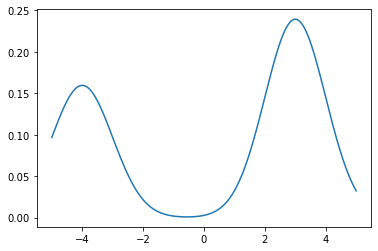

In [2]:
#データが生成される真の分布の作成
x = np.linspace(-5, 5, 1000)
gauss1 = norm.pdf(x, -4, 1)*0.4
gauss2 = norm.pdf(x, 3, 1)*0.6
plt.plot(x, gauss1+gauss2)

(array([ 99., 122., 101., 117., 133., 156., 168., 158., 147., 136., 170.,
        147., 163., 153., 163., 135., 136., 130., 111.,  91.,  90.,  99.,
         61.,  68.,  66.,  43.,  32.,  31.,  31.,  25.,  18.,  17.,  12.,
         10.,   6.,   9.,   4.,   3.,   2.,   2.,   3.,   1.,   1.,   0.,
          0.,   1.,   1.,   0.,   3.,   6.,   4.,   3.,   8.,   7.,  10.,
          8.,  17.,  17.,  21.,  48.,  36.,  54.,  45.,  63.,  71.,  88.,
         91.,  93., 114., 152., 155., 177., 187., 199., 213., 221., 209.,
        242., 224., 250., 244., 220., 225., 228., 227., 202., 171., 191.,
        165., 127., 161., 135., 113.,  89.,  64.,  74.,  72.,  52.,  50.,
         34.]),
 array([-4.99985710e+00, -4.89987490e+00, -4.79989270e+00, -4.69991050e+00,
        -4.59992830e+00, -4.49994610e+00, -4.39996390e+00, -4.29998170e+00,
        -4.19999950e+00, -4.10001730e+00, -4.00003510e+00, -3.90005290e+00,
        -3.80007070e+00, -3.70008850e+00, -3.60010630e+00, -3.50012410e+00,
        -3.400

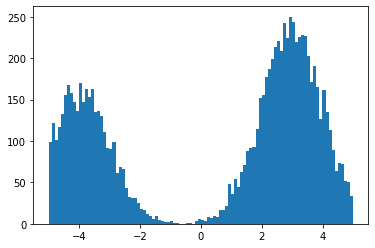

In [3]:
#データが生成される真の分布から10000の点を観測（サンプリング）
a1 = norm.rvs(loc=-4, scale=1, size=4000)
a2 = norm.rvs(loc=3, scale=1, size=6000)
a = np.concatenate([a1, a2])
a = np.delete(a, np.where(a<-5))
a = np.delete(a, np.where(a>5))
plt.hist(a, bins=100)

In [4]:
#生成機
def build_generator():
    model = Sequential()
    model.add(Dense(100, input_dim=1))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(100))
    model.add(LeakyReLU(alpha=0.01))
    """
    #最初に使用した表現力の低いネットワーク
    model.add(Dense(10, input_dim=1))
    model.add(LeakyReLU(alpha=0.01))
    """
    model.add(Dense(1, activation='tanh'))
    return model

In [5]:
#識別機
def build_discriminator():
    model = Sequential()
    model.add(Dense(100, input_dim=1))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(100))
    model.add(LeakyReLU(alpha=0.01))
    """
    #最初に使用した表現力の低いネットワーク
    model.add(Dense(10, input_dim=1))
    model.add(LeakyReLU(alpha=0.01))
    """
    model.add(Dense(1, activation='sigmoid'))
    return model

In [6]:
#GAN
def build_gan(generator, discriminator):
    model=Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

In [7]:
#それぞれのロスと学習率を決定
discriminator = build_discriminator()
discriminator.compile(loss = 'binary_crossentropy',
                     optimizer=Adam(),
                     metrics=['accuracy'])
generator = build_generator()
discriminator.trainable = False
gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer=Adam())

(array([  1.,   0.,   0.,   1.,   2.,   0.,   0.,   2.,   7.,   5.,   3.,
          3.,   7.,   6.,   9.,  10.,  17.,  14.,  20.,  18.,  26.,  36.,
         37.,  46.,  41.,  65.,  70.,  83.,  92.,  84., 126., 139., 147.,
        124., 165., 161., 175., 203., 207., 205., 222., 245., 238., 299.,
        287., 301., 312., 310., 297., 280., 314., 270., 286., 300., 257.,
        234., 267., 208., 242., 211., 224., 206., 184., 170., 177., 148.,
        163., 119., 129.,  93.,  84.,  76.,  84.,  58.,  49.,  41.,  39.,
         37.,  24.,  28.,  26.,  14.,  21.,  17.,   9.,   6.,   5.,   7.,
          9.,   2.,   2.,   4.,   0.,   0.,   3.,   1.,   3.,   0.,   0.,
          1.]),
 array([-3.67672065, -3.60227554, -3.52783043, -3.45338533, -3.37894022,
        -3.30449511, -3.23005   , -3.15560489, -3.08115978, -3.00671468,
        -2.93226957, -2.85782446, -2.78337935, -2.70893424, -2.63448914,
        -2.56004403, -2.48559892, -2.41115381, -2.3367087 , -2.26226359,
        -2.18781849, -2.11

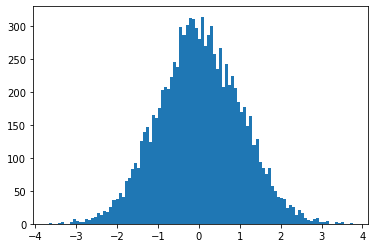

In [8]:
#潜在変数空間の確認
#平均0, 分散１の1次元ガウス分布
z = np.random.normal(0, 1, 10000)
plt.hist(z, bins=100)

(array([  1.,   0.,   0.,   0.,   0.,   1.,   3.,   0.,   3.,   0.,   0.,
          0.,   0.,   1.,   2.,   2.,   1.,   0.,   3.,   4.,   5.,   3.,
          5.,   2.,   3.,   4.,   4.,   5.,   7.,  11.,  10.,  11.,   4.,
         12.,  11.,  14.,  12.,  17.,  12.,  14.,  22.,  18.,  21.,  16.,
         23.,  21.,  22.,  30.,  29.,  25.,  46.,  40.,  42.,  34.,  37.,
         49.,  52.,  46.,  68.,  64.,  52.,  68.,  83.,  88.,  71.,  95.,
         99.,  95.,  94., 108., 114., 119., 125., 142., 151., 164., 181.,
        176., 184., 201., 236., 239., 227., 251., 278., 266., 265., 317.,
        308., 320., 352., 356., 368., 393., 408., 397., 440., 443., 424.,
        410.]),
 array([-5.1070970e-01, -5.0560290e-01, -5.0049609e-01, -4.9538931e-01,
        -4.9028251e-01, -4.8517573e-01, -4.8006892e-01, -4.7496212e-01,
        -4.6985534e-01, -4.6474853e-01, -4.5964172e-01, -4.5453495e-01,
        -4.4942814e-01, -4.4432133e-01, -4.3921456e-01, -4.3410775e-01,
        -4.2900094e-01, -4.238

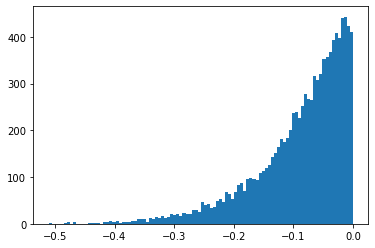

In [9]:
#学習前の生成機に対して潜在変数を入力
z = z.reshape(-1, 1)
z.shape
gen = generator.predict(z)
plt.hist(gen, bins=100)

In [10]:
#GANの学習
losses = []
accuracies = []
iteration_checkpoints = []
def train(iterations, batch_size, sample_interval):
    X_train = a.copy()
    X_train = np.delete(X_train, np.where(X_train<-5))
    X_train = np.delete(X_train, np.where(X_train>5))
    X_train = X_train/5.0
    real = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))
    for iteration in range(iterations):
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]
        
        z = np.random.normal(0, 1, (batch_size, 1))
        gens = generator.predict(z)
        
        d_loss_real = discriminator.train_on_batch(imgs, real)
        d_loss_fake = discriminator.train_on_batch(gens, fake)
        d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)
        
        z = np.random.normal(0, 1, (batch_size, 1))
        gens = generator.predict(z)
        g_loss = gan.train_on_batch(z, real)
        losses.append((d_loss, g_loss))
        if (iteration+1) % sample_interval == 0:
            accuracies.append(100.0 * accuracy)
            iteration_checkpoints.append(iteration+1)
            
            print('%d [D:loss: %f, acc.: %.2f%%] [G loss: %f]' %
                 (iteration+1, d_loss, 100.0*accuracy, g_loss))
            sample_images(generator)
        

In [11]:
#どの様に学習が進んでいるかを可視化
def sample_images(generator):
    fig = plt.figure()
    z = np.random.normal(0, 1, (10000, 1))
    gens = generator.predict(z)
    gens = gens*5
    plt.hist(gens, bins = 100)

/mnt/nfs/kawanan/anaconda3/envs/GAN/lib/python3.6/site-packages/keras/engine/training.py:975: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


100 [D:loss: 0.639351, acc.: 66.99%] [G loss: 1.144425]
200 [D:loss: 0.638685, acc.: 60.79%] [G loss: 0.684307]
300 [D:loss: 0.682659, acc.: 50.00%] [G loss: 0.861842]
400 [D:loss: 0.691000, acc.: 53.03%] [G loss: 0.726599]
500 [D:loss: 0.694000, acc.: 52.05%] [G loss: 0.767130]
600 [D:loss: 0.699578, acc.: 56.69%] [G loss: 0.716853]
700 [D:loss: 0.690064, acc.: 57.96%] [G loss: 0.757492]
800 [D:loss: 0.691168, acc.: 56.84%] [G loss: 0.752238]
900 [D:loss: 0.695103, acc.: 49.85%] [G loss: 0.731692]
1000 [D:loss: 0.693307, acc.: 51.95%] [G loss: 0.701575]


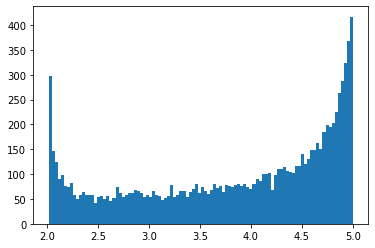

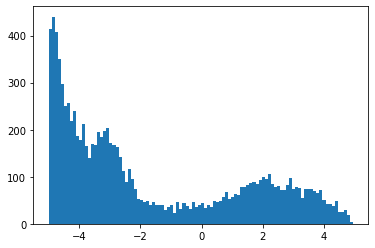

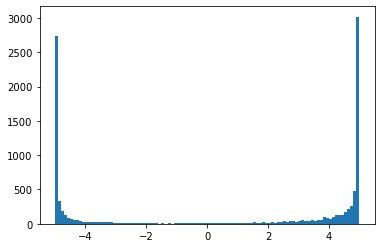

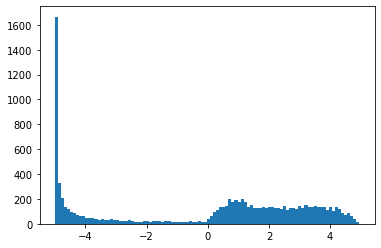

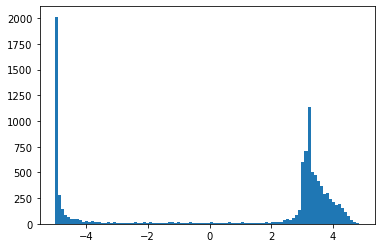

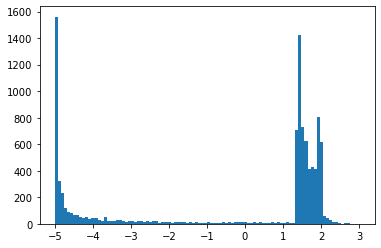

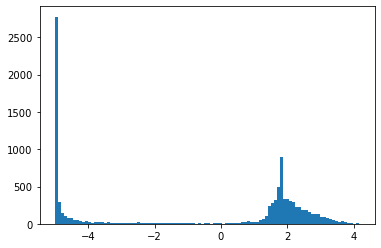

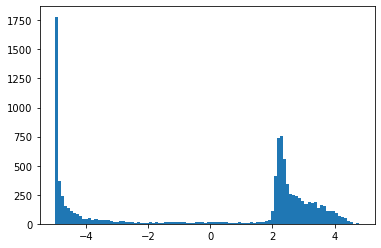

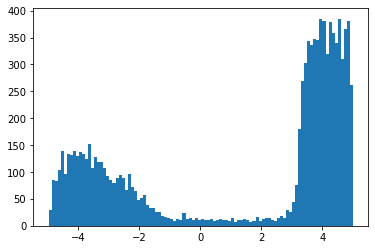

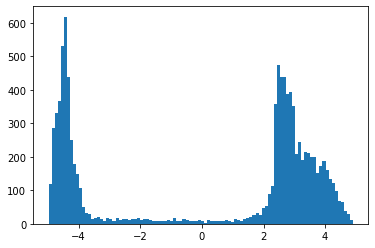

In [12]:
iterations = 1000
batch_size = 2**10
sample_interval = 100
train(iterations, batch_size, sample_interval)

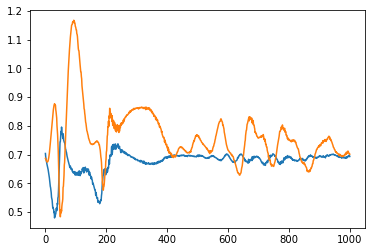

In [13]:
plt.plot(range(len(losses)), losses)

In [14]:
def kernel_predict(X, min_value=-5.0, max_value=5.0, split=0.01):
    x = np.linspace(min_value, max_value, int((max_value-min_value)/split))
    t = np.zeros(int((max_value-min_value)/split))
    for i in range(len(X)):
        t += norm.pdf(x,X[i],1)
    plt.plot(x, t)

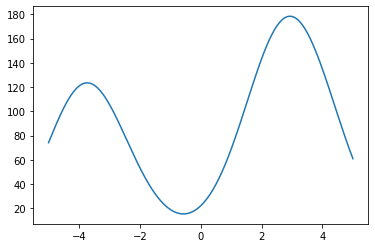

In [15]:
idx = np.random.randint(0, a.shape[0], batch_size)
kernel_predict(a[idx])